In [59]:
"""
This code makes diagnostic plots for raw and postprocessed WRF-Solar output
Postprocessing using the Kalman Filter is from Rafael Alvarenga's code (rafael.alvarenga@etu.univ-guyane.fr)
"""
from file_func import *
from plotting import *
import matplotlib.image as mpimg
import seaborn as sns
from scipy.stats import ks_2samp

In [60]:
li = pd.DataFrame()
method= 'KF'

ens = 'ensmean'
domain = 'd01'
for nb_historical_days in [3,7,14,21,28,35,42,49,56,63,70]:   
    
    dir_path_recursive = f'{main_dir_path_recursive}/{ens}/{domain}/{station_name}/{nb_historical_days}_day_{method}'
    all_files = glob.glob(dir_path_recursive + "/*_df.csv")

    for filename in all_files:
        df = pd.read_csv(filename)
        df['nbhd'] = nb_historical_days
        df['rmse_mod'] = fitting(df)[7]
        df['r_mod'] = fitting(df)[0]
        df['mae_mod'] = fitting(df)[8]

        df['kfp_rmse'] = fitting_pred(df)[7]
        df['kfp_r'] = fitting_pred(df)[0]
        df['kfp_mae'] = fitting_pred(df)[8]

        df['kf_rmse'] = kf_fitting_pred(df)[7]
        df['kf_r'] = kf_fitting_pred(df)[0]
        df['kf_mae'] = kf_fitting_pred(df)[8]

        li = li.append(df)
        print(filename)


output_junaug/ensmean/d01/MO/3_day_KF/ensmean_d01_3_day_KF_df.csv
output_junaug/ensmean/d01/MO/7_day_KF/ensmean_d01_7_day_KF_df.csv
output_junaug/ensmean/d01/MO/14_day_KF/ensmean_d01_14_day_KF_df.csv
output_junaug/ensmean/d01/MO/21_day_KF/ensmean_d01_21_day_KF_df.csv
output_junaug/ensmean/d01/MO/28_day_KF/ensmean_d01_28_day_KF_df.csv
output_junaug/ensmean/d01/MO/35_day_KF/ensmean_d01_35_day_KF_df.csv
output_junaug/ensmean/d01/MO/42_day_KF/ensmean_d01_42_day_KF_df.csv
output_junaug/ensmean/d01/MO/49_day_KF/ensmean_d01_49_day_KF_df.csv
output_junaug/ensmean/d01/MO/56_day_KF/ensmean_d01_56_day_KF_df.csv
output_junaug/ensmean/d01/MO/63_day_KF/ensmean_d01_63_day_KF_df.csv
output_junaug/ensmean/d01/MO/70_day_KF/ensmean_d01_70_day_KF_df.csv


In [61]:
li

,Unnamed: 0,Time,CMP22_Total_Solar,SPN1_Total_Solar,SPN1_Diff_Solar,CGR4_IR,dhi,ghi_a,sza,cossza,...,nbhd,rmse_mod,r_mod,mae_mod,kfp_rmse,kfp_r,kfp_mae,kf_rmse,kf_r,kf_mae
0,78,2020-06-02 05:30:00+08:00,0.021910,23.498014,18.198788,1218.817498,18.198788,23.498014,89.364776,0.011087,...,3,215.816869,0.70407,155.697065,216.198058,0.702135,153.763108,232.541872,0.646377,167.375744
1,79,2020-06-02 05:40:00+08:00,0.016082,23.694669,18.839558,1218.995382,18.839558,23.694669,87.329351,0.046595,...,3,215.816869,0.70407,155.697065,216.198058,0.702135,153.763108,232.541872,0.646377,167.375744
2,80,2020-06-02 05:50:00+08:00,0.052092,45.740527,26.809797,1220.141132,26.809797,45.740527,85.172973,0.084148,...,3,215.816869,0.70407,155.697065,216.198058,0.702135,153.763108,232.541872,0.646377,167.375744
3,81,2020-06-02 06:00:00+08:00,0.073740,83.262937,29.815790,1221.000874,29.815790,83.262937,82.966751,0.122445,...,3,215.816869,0.70407,155.697065,216.198058,0.702135,153.763108,232.541872,0.646377,167.375744
4,82,2020-06-02 06:10:00+08:00,0.104845,96.432498,34.065631,1221.888542,34.065631,96.432498,80.734649,0.161007,...,3,215.816869,0.70407,155.697065,216.198058,0.702135,153.763108,232.541872,0.646377,167.375744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6448,6526,2020-08-24 17:30:00+08:00,0.006842,13.031749,11.629953,1245.788770,11.629953,13.031749,80.520002,0.164703,...,70,215.816869,0.70407,155.697065,215.728733,0.701828,153.413047,226.945172,0.659839,162.497097
6449,6527,2020-08-24 17:40:00+08:00,0.009695,12.623990,11.233657,1245.894269,11.233657,12.623990,82.881484,0.123922,...,70,215.816869,0.70407,155.697065,215.728733,0.701828,153.413047,226.945172,0.659839,162.497097
6450,6528,2020-08-24 17:50:00+08:00,-0.002835,5.284972,4.101292,1243.900849,4.101292,5.284972,85.219265,0.083343,...,70,215.816869,0.70407,155.697065,215.728733,0.701828,153.413047,226.945172,0.659839,162.497097
6451,6529,2020-08-24 18:00:00+08:00,0.003011,2.643337,1.940742,1243.654620,1.940742,2.643337,87.504768,0.043536,...,70,215.816869,0.70407,155.697065,215.728733,0.701828,153.413047,226.945172,0.659839,162.497097


In [58]:
da_mean = li

x_new = np.linspace(0.01, 1360, 1000)
color_= 'green'
i =0

for nb_historical_days in [3,7,14,21,28,35,42,49,56,63,70]:     
    if i==0:
        l = 'a'
    elif i==1:
        l = 'b'
    elif i==2:
        l = 'c'
    elif i==3:
        l = 'd'
    elif i==4:
        l = 'e'
    elif i==5:
        l = 'f'
    elif i==6:
        l = 'g'
    elif i==7:
        l = 'h'
    elif i==8:
        l = 'i'
    elif i==9:
        l = 'j'
    elif i==10:
        l = 'k'
    back = da_mean[da_mean['nbhd'] == nb_historical_days]
    nb_LTs = len(np.unique(back.LT))
    back =  back.iloc[nb_LTs*nb_historical_days:,:] 
    
    method = 'KF WRF-Solar 5-km'
    
    rmse = kf_fitting_pred(back)[7]
    r_ =  kf_fitting_pred(back)[0]
    mae = kf_fitting_pred(back)[8]
    
    ss = 8
    nl = 6
    if (i >=6):
        ss=20
    if (i >=9):
        nl = 4
    g0 = sns.jointplot(x="ghi_obs", y='GHI_pred_kf_only', data=back, kind="kde", space=0,  xlim = (0,1360), ylim = (0,1360), marginal_kws={"color":"black", "lw":3.5}, joint_kws={"colors":"black","cmap":None, "linewidths":1.5}, shade=False, n_levels=nl)
    sns.scatterplot(data=back, x='ghi_obs', y='GHI_pred_kf_only',color=color_, ax=g0.ax_joint,s=ss,alpha=0.8)
    g0.ax_joint.plot(x_new,x_new,c='gray',linewidth=1.1)
    g0.ax_joint.text( -400, 1400,f'{l}', fontsize=30, color='k',zorder=0)
    g0.ax_joint.text( 50, 1200,f'{nb_historical_days} days', fontsize=30, color='black')
    g0.ax_joint.text( 50, 1000,'RMSE = %0.1f'%rmse, fontsize=30, color='black')
    g0.ax_joint.text( 50, 1100,'MAE = %0.1f'%mae, fontsize=30, color='black')
    if (i==0) | (i==3) | (i==6) | (i==9):
        g0.ax_joint.set_ylabel(f'{method}\nGHI (W/m$^2$)',  fontsize=30) 
    else:
        g0.ax_joint.set_ylabel(' ',  fontsize=30)
    if (i>=8):    
        g0.ax_joint.set_xlabel(f'observed\nGHI (W/m$^2$)',  fontsize=30)
    else:
        g0.ax_joint.set_xlabel(' ',  fontsize=30)

    g0.ax_joint.tick_params(axis='both', which='major', labelsize=30)
    [x.set_linewidth(2.5) for x in g0.ax_joint.spines.values()]
    g0.ax_joint.xaxis.set_tick_params(width=30)
    g0.ax_joint.yaxis.set_tick_params(width=30)
    g0.savefig(f'{ens}_{domain}_{nb_historical_days}.png')
    plt.close(g0.fig)
    i = i+1
        


ValueError: Inputs must not be empty.

ensmean d01 KstestResult(statistic=0.07112970711297072, pvalue=1.2914331010483174e-14) 167.37574429911479
ensmean d01 KstestResult(statistic=0.10429257709592438, pvalue=5.8243750960133405e-31) 159.7922934461273
ensmean d01 KstestResult(statistic=0.10537734387106772, pvalue=1.3351779068772214e-31) 157.9573199740653
ensmean d01 KstestResult(statistic=0.11235084456841779, pvalue=7.141806791570993e-36) 157.3995871759239
ensmean d01 KstestResult(statistic=0.10770184410351774, pvalue=5.3984934114722766e-33) 156.8225595249688
ensmean d01 KstestResult(statistic=0.10367271036727103, pvalue=1.3421601645534262e-30) 156.73902183599233
ensmean d01 KstestResult(statistic=0.09096544242987757, pvalue=1.2046134599944344e-23) 158.0493494854535
ensmean d01 KstestResult(statistic=0.08724624205795754, pvalue=8.773177619701044e-22) 161.54991202698247
ensmean d01 KstestResult(statistic=0.0835270416860375, pvalue=5.3376052642868715e-20) 161.7713846869011
ensmean d01 KstestResult(statistic=0.08337207500387417,

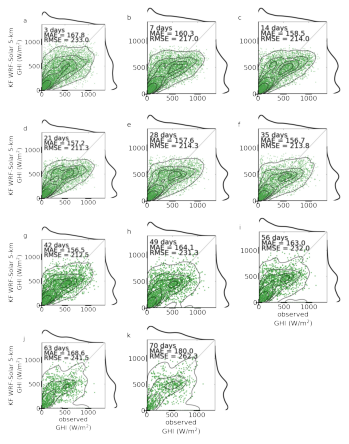

In [53]:
f, axarr = plt.subplots(4, 3, figsize=(6, 8))

axarr[0,0].imshow(mpimg.imread('ensmean_d01_3.png'))
axarr[0,1].imshow(mpimg.imread('ensmean_d01_7.png'))
axarr[0,2].imshow(mpimg.imread('ensmean_d01_14.png'))

axarr[1,0].imshow(mpimg.imread('ensmean_d01_21.png'))
axarr[1,1].imshow(mpimg.imread('ensmean_d01_28.png'))
axarr[1,2].imshow(mpimg.imread('ensmean_d01_35.png'))

axarr[2,0].imshow(mpimg.imread('ensmean_d01_42.png'))
axarr[2,1].imshow(mpimg.imread('ensmean_d01_49.png'))
axarr[2,2].imshow(mpimg.imread('ensmean_d01_56.png'))

axarr[3,0].imshow(mpimg.imread('ensmean_d01_63.png'))
axarr[3,1].imshow(mpimg.imread('ensmean_d01_70.png'))
[ax.set_axis_off() for ax in axarr.ravel()]

plt.subplots_adjust(wspace=-0., hspace=-0.05)
#plt.tight_layout()
plt.savefig(f"{main_dir_path_recursive}/models_Manila_scatplot_{ens}_{domain}_td.png", dpi=500,  facecolor='white', bbox_inches="tight")


#perform Kolmogorov-Smirnov test

##########################################
da_mean = li
for nb_historical_days in [3,7,14,21,28,35,42,49,56,63,70]:      
    back = da_mean[da_mean['nbhd'] == nb_historical_days]
    data1 = back['ghi_obs']
    data2 = back['GHI_pred_kf_only']
    print(ens, domain, ks_2samp(data1, data2),mean_absolute_error(data1, data2))
        


In [78]:
li = pd.DataFrame()
method= 'KF'

ens = 'ens2'
domain = 'd01'
for nb_historical_days in [3,7,14,21,28,35,42,49,56,63,70]:   
    
    dir_path_recursive = f'{main_dir_path_recursive}/{ens}/{domain}/{station_name}/{nb_historical_days}_day_{method}'
    all_files = glob.glob(dir_path_recursive + "/*_df.csv")

    for filename in all_files:
        df = pd.read_csv(filename)
        df['nbhd'] = nb_historical_days
        df['rmse_mod'] = fitting(df)[7]
        df['r_mod'] = fitting(df)[0]
        df['mae_mod'] = fitting(df)[8]

        df['kfp_rmse'] = fitting_pred(df)[7]
        df['kfp_r'] = fitting_pred(df)[0]
        df['kfp_mae'] = fitting_pred(df)[8]

        df['kf_rmse'] = kf_fitting_pred(df)[7]
        df['kf_r'] = kf_fitting_pred(df)[0]
        df['kf_mae'] = kf_fitting_pred(df)[8]

        li = li.append(df)
        print(filename)


output_junaug/ens2/d01/MO/3_day_KF/ens2_d01_3_day_KF_df.csv
output_junaug/ens2/d01/MO/7_day_KF/ens2_d01_7_day_KF_df.csv
output_junaug/ens2/d01/MO/14_day_KF/ens2_d01_14_day_KF_df.csv
output_junaug/ens2/d01/MO/21_day_KF/ens2_d01_21_day_KF_df.csv
output_junaug/ens2/d01/MO/28_day_KF/ens2_d01_28_day_KF_df.csv
output_junaug/ens2/d01/MO/35_day_KF/ens2_d01_35_day_KF_df.csv
output_junaug/ens2/d01/MO/42_day_KF/ens2_d01_42_day_KF_df.csv
output_junaug/ens2/d01/MO/49_day_KF/ens2_d01_49_day_KF_df.csv
output_junaug/ens2/d01/MO/56_day_KF/ens2_d01_56_day_KF_df.csv
output_junaug/ens2/d01/MO/63_day_KF/ens2_d01_63_day_KF_df.csv
output_junaug/ens2/d01/MO/70_day_KF/ens2_d01_70_day_KF_df.csv


In [79]:
da_mean = li

x_new = np.linspace(0.01, 1360, 1000)
color_= 'red'
i =0

for nb_historical_days in [3,7,14,21,28,35,42,49,56,63,70]:     
    if i==0:
        l = 'a'
    elif i==1:
        l = 'b'
    elif i==2:
        l = 'c'
    elif i==3:
        l = 'd'
    elif i==4:
        l = 'e'
    elif i==5:
        l = 'f'
    elif i==6:
        l = 'g'
    elif i==7:
        l = 'h'
    elif i==8:
        l = 'i'
    elif i==9:
        l = 'j'
    elif i==10:
        l = 'k'
    back = da_mean[da_mean['nbhd'] == nb_historical_days]
    nb_LTs = len(np.unique(back.LT))
    back =  back.iloc[nb_LTs*nb_historical_days:,:] 
    
    method = 'KF WRF-Solar 5-km'
    
    rmse = fitting(back)[7]
    r_ =  fitting(back)[0]
    mae = fitting(back)[8]
    
    ss = 8
    nl = 6
    if (i >=6):
        ss=20
    if (i >=9):
        nl = 4
    g0 = sns.jointplot(x="ghi_obs", y='ghi_mod', data=back, kind="kde", space=0,  xlim = (0,1360), ylim = (0,1360), marginal_kws={"color":"black", "lw":3.5}, joint_kws={"colors":"black","cmap":None, "linewidths":1.5}, shade=False, n_levels=nl)
    sns.scatterplot(data=back, x='ghi_obs', y='ghi_mod',color=color_, ax=g0.ax_joint,s=ss,alpha=0.8)
    g0.ax_joint.plot(x_new,x_new,c='gray',linewidth=1.1)
    g0.ax_joint.text( -400, 1400,f'{l}', fontsize=30, color='k',zorder=0)
    g0.ax_joint.text( 50, 1200,f'{nb_historical_days} days', fontsize=30, color='black')
    g0.ax_joint.text( 50, 1000,'RMSE = %0.1f'%rmse, fontsize=30, color='black')
    g0.ax_joint.text( 50, 1100,'MAE = %0.1f'%mae, fontsize=30, color='black')
    if (i==0) | (i==3) | (i==6) | (i==9):
        g0.ax_joint.set_ylabel(f'{method}\nGHI (W/m$^2$)',  fontsize=30) 
    else:
        g0.ax_joint.set_ylabel(' ',  fontsize=30)
    if (i>=8):    
        g0.ax_joint.set_xlabel(f'observed\nGHI (W/m$^2$)',  fontsize=30)
    else:
        g0.ax_joint.set_xlabel(' ',  fontsize=30)

    g0.ax_joint.tick_params(axis='both', which='major', labelsize=30)
    [x.set_linewidth(2.5) for x in g0.ax_joint.spines.values()]
    g0.ax_joint.xaxis.set_tick_params(width=30)
    g0.ax_joint.yaxis.set_tick_params(width=30)
    g0.savefig(f'{ens}_{domain}_{nb_historical_days}_model.png')
    plt.close(g0.fig)
    i = i+1
        


ens2 d01 KstestResult(statistic=0.1853401518673485, pvalue=3.027423898048629e-97) 185.46640197063238
ens2 d01 KstestResult(statistic=0.1853401518673485, pvalue=3.027423898048629e-97) 185.46640197063238
ens2 d01 KstestResult(statistic=0.1853401518673485, pvalue=3.027423898048629e-97) 185.46640197063238
ens2 d01 KstestResult(statistic=0.1853401518673485, pvalue=3.027423898048629e-97) 185.46640197063238
ens2 d01 KstestResult(statistic=0.1853401518673485, pvalue=3.027423898048629e-97) 185.46640197063238
ens2 d01 KstestResult(statistic=0.1853401518673485, pvalue=3.027423898048629e-97) 185.46640197063238
ens2 d01 KstestResult(statistic=0.1853401518673485, pvalue=3.027423898048629e-97) 185.46640197063238
ens2 d01 KstestResult(statistic=0.1853401518673485, pvalue=3.027423898048629e-97) 185.46640197063238
ens2 d01 KstestResult(statistic=0.1853401518673485, pvalue=3.027423898048629e-97) 185.46640197063238
ens2 d01 KstestResult(statistic=0.1853401518673485, pvalue=3.027423898048629e-97) 185.46640

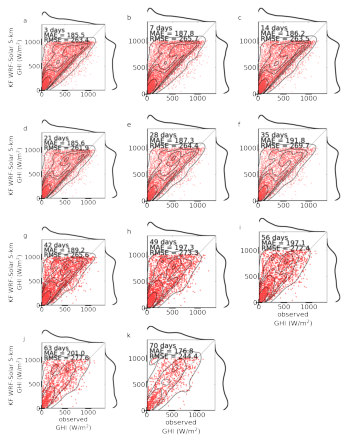

In [80]:
f, axarr = plt.subplots(4, 3, figsize=(6, 8))

axarr[0,0].imshow(mpimg.imread(f'{ens}_d01_3_model.png'))
axarr[0,1].imshow(mpimg.imread(f'{ens}_d01_7_model.png'))
axarr[0,2].imshow(mpimg.imread(f'{ens}_d01_14_model.png'))

axarr[1,0].imshow(mpimg.imread(f'{ens}_d01_21_model.png'))
axarr[1,1].imshow(mpimg.imread(f'{ens}_d01_28_model.png'))
axarr[1,2].imshow(mpimg.imread(f'{ens}_d01_35_model.png'))

axarr[2,0].imshow(mpimg.imread(f'{ens}_d01_42_model.png'))
axarr[2,1].imshow(mpimg.imread(f'{ens}_d01_49_model.png'))
axarr[2,2].imshow(mpimg.imread(f'{ens}_d01_56_model.png'))

axarr[3,0].imshow(mpimg.imread(f'{ens}_d01_63_model.png'))
axarr[3,1].imshow(mpimg.imread(f'{ens}_d01_70_model.png'))
[ax.set_axis_off() for ax in axarr.ravel()]

plt.subplots_adjust(wspace=-0., hspace=-0.05)
#plt.tight_layout()
plt.savefig(f"{main_dir_path_recursive}/models_Manila_scatplot_{ens}_{domain}_td_model.png", dpi=500,  facecolor='white', bbox_inches="tight")


#perform Kolmogorov-Smirnov test

##########################################
da_mean = li
for nb_historical_days in [3,7,14,21,28,35,42,49,56,63,70]:      
    back = da_mean[da_mean['nbhd'] == nb_historical_days]
    data1 = back['ghi_obs']
    data2 = back['ghi_mod']
    print(ens, domain, ks_2samp(data1, data2),mean_absolute_error(data1, data2))
        
